In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
import seaborn as sns

In [15]:
from tensorflow.python.client import device_lib
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 12} ) 
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17216484306593733868
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10062135296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 801634619987063816
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:09:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [16]:
#dataset de imagens de numeros feitos a mao entre 0-9 em formato 28x28
mnist = tf.keras.datasets.mnist

#separando treino e teste
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#preprocessar dados normalizando valores do x
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#criar modelo
model = tf.keras.models.Sequential()
#primeira camada criada como flatten, pois os dados estão em formato 28x28, e então o input deve ser unidimensional
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(228, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(228, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
             )

#treinar modelo
acc_history = model.fit(x_train, y_train, epochs = 400).history['accuracy']

Epoch 1/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2286 - accuracy: 0.9310
Epoch 2/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0901 - accuracy: 0.9714
Epoch 3/400
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0612 - accuracy: 0.9803
Epoch 4/400
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9853
Epoch 5/400
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0315 - accuracy: 0.9895
Epoch 6/400
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0251 - accuracy: 0.9911
Epoch 7/400
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0228 - accuracy: 0.9924
Epoch 8/400
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0167 - accuracy: 0.9942
Epoch 9/400
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0145 - accuracy: 0.9949
Epoch 10/400
1875/1875 [==============================] - 3s 2ms/step - l

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 715us/step - loss: 0.5988 - accuracy: 0.9791


[0.5987623333930969, 0.9790999889373779]

In [46]:
#salvar modelo
model.save("indentificador_numerico.model")

#carregar modelo 
new_model = tf.keras.models.load_model("indentificador_numerico.model")

INFO:tensorflow:Assets written to: indentificador_numerico.model\assets


In [51]:
#fazendo previsões
prev = new_model.predict([x_test])
prev

313/313 [==============================] - 0s 686us/step


array([[3.4178491e-15, 2.2488233e-12, 1.7304613e-10, ..., 9.9999607e-01,
        3.1195227e-11, 6.0836336e-09],
       [1.3258138e-11, 3.2710368e-10, 1.0000000e+00, ..., 2.6122992e-17,
        1.3426686e-14, 4.4959494e-24],
       [7.8161739e-12, 9.9997461e-01, 1.2225460e-06, ..., 2.3750932e-05,
        1.8777587e-07, 6.2698507e-10],
       ...,
       [6.9212994e-17, 2.8456163e-12, 1.9250326e-12, ..., 1.9215115e-08,
        1.1505991e-09, 7.9656743e-08],
       [1.6222659e-11, 4.1429581e-14, 4.1140455e-13, ..., 1.0850936e-09,
        1.7865684e-09, 6.7570203e-14],
       [2.4971863e-12, 3.3649727e-17, 1.4972145e-15, ..., 7.2336925e-20,
        1.2598771e-15, 1.4340678e-16]], dtype=float32)

In [68]:
np.argmax(prev[59])

5

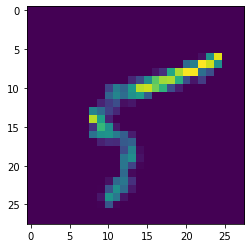

In [67]:
plt.imshow(x_test[59])

Text(0, 0.5, 'acuracia')

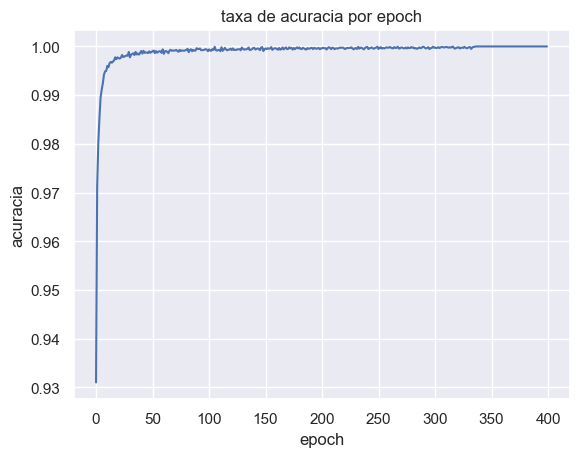

In [30]:
sns.set()
sns.lineplot(acc_history)
plt.title("taxa de acuracia por epoch")
plt.xlabel("epoch")
plt.ylabel("acuracia")

# Exemplo pre processamento

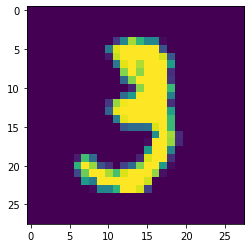

In [27]:
#antes de pre processar
plt.imshow(x_train[10])

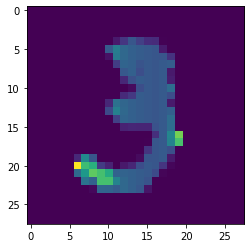

In [29]:
#apos pre processar
plt.imshow(x_train[10])